In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
df= pd.read_csv("titanic_train.csv")

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [131]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [132]:
df.drop(columns=["PassengerId","Name","Cabin","Ticket"], inplace=True)

In [133]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


<Axes: >

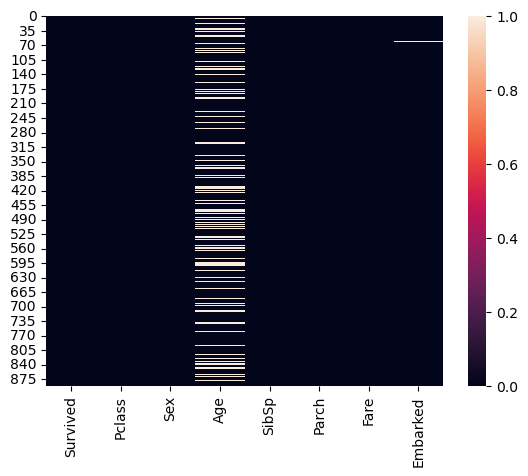

In [134]:
sns.heatmap(df.isna())

In [135]:
df.groupby("Pclass")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [136]:
def fillAge(columns):
    Age = columns[0]
    Pclass = columns[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        elif Pclass==3:
            return 25
    else:
        return Age
    

In [137]:
df["NewAge"] = df[["Age","Pclass"]].apply(fillAge, axis=1)

C:\Users\saras\AppData\Local\Temp\ipykernel_20028\3232820953.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = columns[0]
C:\Users\saras\AppData\Local\Temp\ipykernel_20028\3232820953.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = columns[1]


In [138]:
df.drop("Age", axis=1, inplace=True)


<Axes: >

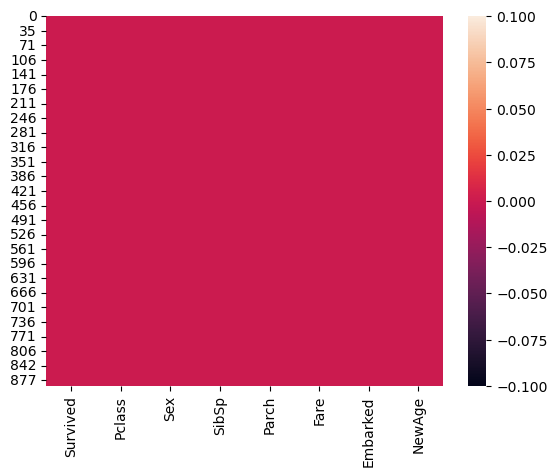

In [139]:
df.dropna(inplace=True)
sns.heatmap(df.isna())


In [140]:
df = pd.get_dummies(data=df, columns=["Embarked","Sex"])

In [141]:
df.head()

,Survived,Pclass,SibSp,Parch,Fare,NewAge,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,1,0,7.2500,22.0,False,False,True,False,True
1,1,1,1,0,71.2833,38.0,True,False,False,True,False
2,1,3,0,0,7.9250,26.0,False,False,True,True,False
3,1,1,1,0,53.1000,35.0,False,False,True,True,False
4,0,3,0,0,8.0500,35.0,False,False,True,False,True


In [142]:
X = df.drop("Survived", axis=1)

In [143]:
y = df["Survived"]

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [146]:
from sklearn.preprocessing import MinMaxScaler

In [147]:
scaler = MinMaxScaler()

In [148]:
scaler.fit(X_train)


MinMaxScaler()

In [149]:
X_train = scaler.transform(X_train)

In [150]:
X_test = scaler.transform(X_test)

In [151]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [152]:
X_train.shape

(595, 10)

In [153]:
model = Sequential()


model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [154]:
from tensorflow.keras.callbacks import EarlyStopping

In [155]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [156]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
callbacks=[early_stop], 
          )

Epoch 1/600
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.8656 - val_loss: 0.7616
Epoch 2/600
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7420 - val_loss: 0.6863
Epoch 3/600
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6674 - val_loss: 0.6240
Epoch 4/600
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6206 - val_loss: 0.5801
Epoch 5/600
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5751 - val_loss: 0.5442
Epoch 6/600
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5500 - val_loss: 0.5126
Epoch 7/600
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5199 - val_loss: 0.4859
Epoch 8/600
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4813 - val_loss: 0.4660
Epoch 9/600
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4983 - val_loss: 0.4550
Epoch 10/600
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4831 - val_loss: 0.4471
Epoch 11/600
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4402 - val_loss: 0.4408
Epoch 12/600
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

<Axes: >

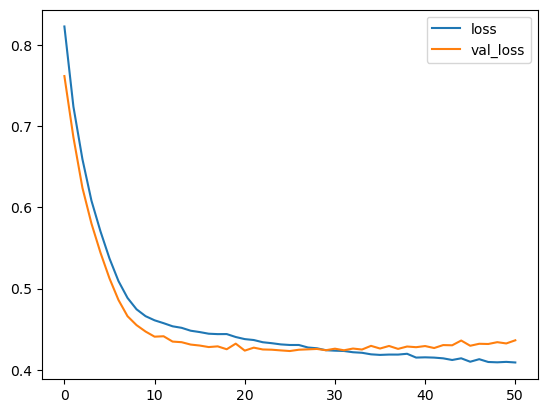

In [157]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [158]:
from tensorflow.keras.layers import Dropout

In [159]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [160]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.4427 - loss: 0.8260 - val_accuracy: 0.6395 - val_loss: 0.6611
Epoch 2/600
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5174 - loss: 0.7394 - val_accuracy: 0.6259 - val_loss: 0.6118
Epoch 3/600
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5792 - loss: 0.6716 - val_accuracy: 0.6361 - val_loss: 0.5872
Epoch 4/600
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5584 - loss: 0.6664 - val_accuracy: 0.6735 - val_loss: 0.5734
Epoch 5/600
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6498 - loss: 0.6488 - val_accuracy: 0.7007 - val_loss: 0.5643
Epoch 6/600
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6579 - loss: 0.6391 - val_accuracy: 0.7449 - val_loss: 0.5543
Epoch 7/600
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6856 - loss: 0.6083 - val_accuracy: 0.8129 - val_loss: 0.5437
Epoch 8/600
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6918 - loss: 0.6004 - val_accuracy: 0.

<Axes: >

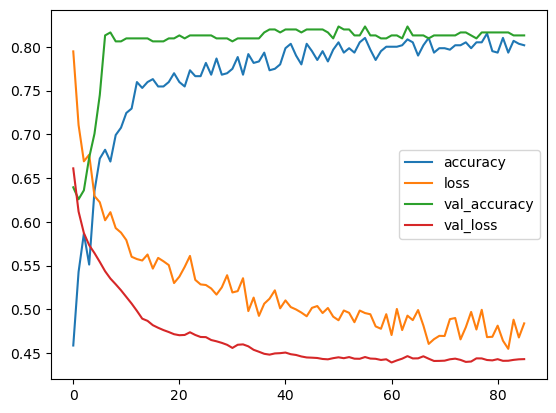

In [161]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [172]:
predictions = model.predict(X_test)
final_predictions = (predictions > 0.5).astype(int)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [170]:
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score

In [164]:
#prediction

In [173]:
print(classification_report(y_test,final_predictions))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       184
           1       0.83      0.63      0.72       110

    accuracy                           0.81       294
   macro avg       0.82      0.78      0.79       294
weighted avg       0.82      0.81      0.81       294



In [174]:
print(confusion_matrix(y_test,final_predictions))

[[170  14]
 [ 41  69]]


In [175]:
roc_auc_score(y_test,final_predictions)

0.7755928853754942